In [10]:
# a = os.listdir('/Users/qasem/Downloads/all_sub_data'+'/timeseries/')[0]
# pd.read_csv(a, sep='\t', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'sub-35_stat-fullSA-task_space-fsLR_den-91k_bold_timeseries.tsv'

In [19]:
import os

dir = '/Users/qasem/Downloads/all_sub_data/'
files = os.listdir(dir+'timeseries/')
files.remove('.DS_Store')

In [20]:
import pandas as pd


def make_regions():
    df0 = pd.read_csv(dir+'timeseries/'+files[0], sep='\t', index_col=0)

    regions = df0.columns
    # convert to pd.DataFrame with multiple columns
    regions = regions.to_series().apply(lambda x: x.split('_')).apply(pd.Series)
    regions = regions.drop(0, axis=1)
    regions.columns = ['hemi', 'net', 'subnet', 'num']

    # swap num and subnet if regions.num is null
    regions.loc[regions.num.isnull(), ['num', 'subnet']] = \
        regions.loc[regions.num.isnull(), ['subnet', 'num']].values

    # convert it to be used as a multiindex
    regions = regions.set_index(['hemi', 'net', 'subnet', 'num'])
    return regions

regions = make_regions()
regions

Empty DataFrame
Columns: []
Index: [(LH, ASHS, nan, 1), (LH, ASHS, nan, 2), (LH, ASHS, nan, 3), (LH, ASHS, nan, 4), (LH, ASHS, nan, 5), (LH, ASHS, nan, 6), (LH, ASHS, nan, 7), (RH, ASHS, nan, 1), (RH, ASHS, nan, 2), (RH, ASHS, nan, 3), (RH, ASHS, nan, 4), (RH, ASHS, nan, 5), (RH, ASHS, nan, 6), (RH, ASHS, nan, 7), (LH, Vis, nan, 1), (LH, Vis, nan, 2), (LH, Vis, nan, 3), (LH, Vis, nan, 4), (LH, Vis, nan, 5), (LH, Vis, nan, 6), (LH, Vis, nan, 7), (LH, Vis, nan, 8), (LH, Vis, nan, 9), (LH, Vis, nan, 10), (LH, Vis, nan, 11), (LH, Vis, nan, 12), (LH, Vis, nan, 13), (LH, Vis, nan, 14), (LH, Vis, nan, 15), (LH, Vis, nan, 16), (LH, Vis, nan, 17), (LH, Vis, nan, 18), (LH, Vis, nan, 19), (LH, Vis, nan, 20), (LH, Vis, nan, 21), (LH, Vis, nan, 22), (LH, Vis, nan, 23), (LH, Vis, nan, 24), (LH, Vis, nan, 25), (LH, Vis, nan, 26), (LH, Vis, nan, 27), (LH, Vis, nan, 28), (LH, Vis, nan, 29), (LH, Vis, nan, 30), (LH, Vis, nan, 31), (LH, Vis, nan, 32), (LH, Vis, nan, 33), (LH, Vis, nan, 34), (LH, Vis, nan, 35), (LH, Vis, nan, 36), (LH, Vis, nan, 37), (LH, Vis, nan, 38), (LH, Vis, nan, 39), (LH, Vis, nan, 40), (LH, Vis, nan, 41), (LH, Vis, nan, 42), (LH, Vis, nan, 43), (LH, Vis, nan, 44), (LH, Vis, nan, 45), (LH, Vis, nan, 46), (LH, Vis, nan, 47), (LH, Vis, nan, 48), (LH, Vis, nan, 49), (LH, Vis, nan, 50), (LH, Vis, nan, 51), (LH, Vis, nan, 52), (LH, Vis, nan, 53), (LH, Vis, nan, 54), (LH, Vis, nan, 55), (LH, Vis, nan, 56), (LH, Vis, nan, 57), (LH, Vis, nan, 58), (LH, Vis, nan, 59), (LH, Vis, nan, 60), (LH, Vis, nan, 61), (LH, Vis, nan, 62), (LH, Vis, nan, 63), (LH, Vis, nan, 64), (LH, Vis, nan, 65), (LH, Vis, nan, 66), (LH, Vis, nan, 67), (LH, Vis, nan, 68), (LH, Vis, nan, 69), (LH, Vis, nan, 70), (LH, Vis, nan, 71), (LH, Vis, nan, 72), (LH, Vis, nan, 73), (LH, Vis, nan, 74), (LH, Vis, nan, 75), (LH, Vis, nan, 76), (LH, Vis, nan, 77), (LH, Vis, nan, 78), (LH, Vis, nan, 79), (LH, Vis, nan, 80), (LH, Vis, nan, 81), (LH, SomMot, nan, 1), (LH, SomMot, nan, 2), (LH, SomMot, nan, 3), (LH, SomMot, nan, 4), (LH, SomMot, nan, 5), ...]

[1012 rows x 0 columns]

In [23]:
ts_subjects =[]
subject_ids = list(map(lambda fname: int(fname[4:6]), files))

for f in files:
    ts_subjects.append(
        pd.read_csv(dir+'timeseries/'+f, sep='\t', index_col=0))

df = pd.concat(ts_subjects, axis=0, keys=subject_ids)
df.columns = regions.index
df.rename_axis(['subject', 'tr'], axis=0, inplace=True)
df.head()

hemi              LH                                                    \
net             ASHS                                                     
subnet           NaN                                                     
num                1         2         3         4         5         6   
subject tr                                                               
35      0   0.635781 -0.017202 -0.330442 -0.547440 -0.875384  1.573918   
        1  -0.324437  1.086482 -0.294524 -1.185715 -1.195052 -0.185929   
        2  -0.672025  1.610249 -0.236520 -0.918742 -0.817490 -1.204738   
        3  -0.277838  1.395727 -0.181988  0.358166  0.320860 -1.222458   
        4   0.433430  0.753420 -0.208007  1.858203  1.594640 -0.543635   

hemi                        RH                      ...                      \
net                       ASHS                      ...   Default             
subnet                     NaN                      ...   pCunPCC             
num                7         1         2         3  ...        11        12   
subject tr                                          ...                       
35      0  -0.315385  0.871486  1.373802  1.060355  ...  0.915473  1.869758   
        1  -0.482376  0.183991 -0.306035  0.088978  ...  0.660886  1.109708   
        2  -0.493117  0.175602 -0.863703 -0.470137  ...  0.185245  0.401620   
        3  -0.238358  0.861051 -0.096337 -0.392808  ... -0.360245 -0.133168   
        4   0.275515  1.577037  1.172233  0.259833  ... -0.503619 -0.345575   

hemi                                                                    \
net                                                                      
subnet                                                                   
num               13        14        15        16        17        18   
subject tr                                                               
35      0   2.064284 -0.615643  0.387870  1.634254  1.764425  1.586501   
        1   0.573712  0.369735  0.345780  0.897956  1.313960  0.763824   
        2  -0.522692  0.743225 -0.200039  0.097562  0.715596  0.136251   
        3  -0.956849  0.403840 -1.122557 -0.671051  0.059200 -0.187254   
        4  -0.703522 -0.182107 -1.700482 -1.173211 -0.347696 -0.197462   

hemi                            
net             Cont            
subnet          pCun            
num                2         4  
subject tr                      
35      0  -0.107764  2.076928  
        1  -0.170256  0.511392  
        2  -0.299823 -0.311068  
        3  -0.362085 -0.126583  
        4  -0.083060  0.733102  

[5 rows x 1012 columns]

In [82]:
# df.loc[2, ('LH', 'Vis')]  # access it like this

In [24]:
# take conn mats for each subject
import numpy as np
from nilearn.connectome import ConnectivityMeasure


def cmat(ts: pd.DataFrame, fill_diag=False, kind='covariance') -> np.ndarray:
    conn_measure = ConnectivityMeasure(kind=kind)
    cmat = conn_measure.fit_transform([ts.to_numpy()])[0]
    if fill_diag:   np.fill_diagonal(cmat, 0)
    return cmat

In [25]:
print(subject_ids)

[35, 37, 29, 2, 31, 6, 18, 33, 21, 14, 16, 10, 25, 27, 12, 1, 34, 36, 28, 3, 30, 5, 7, 19, 32, 20, 15, 17, 22, 11, 24, 26, 13]


In [26]:
# take average conn mats    # maybe later: riemannian mean
baseline_len = 203
cmats = np.stack([cmat(
    df.loc[pd.IndexSlice[subj, :baseline_len], :]
) for subj in subject_ids])

In [27]:
cmat_mean = np.mean(cmats, axis=0)

In [28]:
pd.DataFrame(cmat_mean, index=regions.index, columns=regions.index)

hemi                            LH                                          \
net                           ASHS                                           
subnet                         NaN                                           
num                              1         2         3         4         5   
hemi net     subnet  num                                                     
LH   ASHS    NaN     1    1.000650  0.282854  0.313534  0.076764  0.224577   
                     2    0.282854  1.000124  0.385058  0.158624  0.280311   
                     3    0.313534  0.385058  1.001241  0.118437  0.213824   
                     4    0.076764  0.158624  0.118437  1.001729  0.258486   
                     5    0.224577  0.280311  0.213824  0.258486  1.001086   
...                            ...       ...       ...       ...       ...   
RH   Default pCunPCC 16   0.112843  0.172409  0.185744  0.088641  0.164740   
                     17   0.161043  0.193487  0.162654  0.016196  0.205865   
                     18   0.168132  0.177701  0.191424  0.044510  0.198982   
     Cont    pCun    2    0.079410  0.129380  0.117030  0.027253  0.186395   
                     4    0.126465  0.154669  0.155225  0.053678  0.179709   

hemi                                                RH                      \
net                                               ASHS                       
subnet                                             NaN                       
num                              6         7         1         2         3   
hemi net     subnet  num                                                     
LH   ASHS    NaN     1    0.200852  0.204824  0.242139  0.185870  0.224515   
                     2    0.247936  0.307564  0.260821  0.253899  0.239902   
                     3    0.229084  0.296386  0.218148  0.209757  0.242479   
                     4    0.254685  0.117568  0.082048  0.108598  0.113146   
                     5    0.277768  0.323017  0.278048  0.162878  0.175046   
...                            ...       ...       ...       ...       ...   
RH   Default pCunPCC 16   0.157020  0.217943  0.168531  0.144288  0.149456   
                     17   0.190162  0.194656  0.201738  0.144787  0.167779   
                     18   0.161771  0.215413  0.173736  0.150896  0.165473   
     Cont    pCun    2    0.079531  0.172958  0.116779  0.107012  0.133061   
                     4    0.143911  0.178404  0.149696  0.126567  0.152765   

hemi                      ...                                          \
net                       ...   Default                                 
subnet                    ...   pCunPCC                                 
num                       ...        11        12        13        14   
hemi net     subnet  num  ...                                           
LH   ASHS    NaN     1    ...  0.109605  0.026533  0.113231  0.040230   
                     2    ...  0.160770  0.128835  0.157684  0.106878   
                     3    ...  0.145457  0.096372  0.169338  0.096710   
                     4    ...  0.061318  0.043131  0.073715  0.082030   
                     5    ...  0.185871  0.139039  0.162875  0.156099   
...                       ...       ...       ...       ...       ...   
RH   Default pCunPCC 16   ...  0.423105  0.369562  0.631431  0.391770   
                     17   ...  0.384187  0.283634  0.472592  0.262440   
                     18   ...  0.346638  0.337108  0.454455  0.292971   
     Cont    pCun    2    ...  0.626848  0.492272  0.461536  0.355300   
                     4    ...  0.437835  0.283176  0.578725  0.256594   

hemi                                                                        \
net                                                                   Cont   
subnet                                                                pCun   
num                             15        16        17        18         2   
hemi net     subnet  

In [0]:
from brainspace.gradient.utils import dominant_set
import bct


# give it to compute graph measures

def compute_measures(cmat, thresh=.9, net='7net'):
    """
    from https://github.com/danjgale/adaptation-manifolds
    Calculate region-level connectivity properties pertaining to integration
    and segregation

    Parameters
    ----------
    cmat : np.ndarray
        Dense connectivity matrix
    thresh : float, optional
        Row-wise threshold. By default .9, which is identical to the threshold
        in cograd.gradients

    Returns
    -------
    pd.DataFrame
        Functional connectivity measures for each region
    """

    # affilitation vectors
    r = regions.reset_index()
    network_aff = r[net].to_numpy()
    network_hemi_aff = (r['hemi'] + r[net].astype(str)).to_numpy()

    # threshold and binarize
    x = dominant_set(cmat, k=1 - thresh,
                     is_thresh=False, as_sparse=False)
    x_bin = (x != 0).astype(float)

    measures = pd.DataFrame({
        'participation': bct.participation_coef(x, network_aff, 'out'),
        'participation_h': bct.participation_coef(x, network_hemi_aff, 'out'),
        'module_degree': bct.module_degree_zscore(x_bin, network_aff, 2),
        'module_degree_h': bct.module_degree_zscore(x_bin, network_hemi_aff, 2),
        'strength': np.sum(x, axis=1)},
        index=regions.index)

    return measures

In [30]:
ref_measures = compute_measures(cmat_mean, thresh=.9, net='net')

In [33]:
ref_measures.shape

(1012, 5)

In [37]:
ref_measures.head()

participation  participation_h  module_degree  \
hemi net  subnet num                                                  
LH   ASHS NaN    1         0.809130         0.887674      -0.081680   
                 2         0.820693         0.904158       1.061839   
                 3         0.836111         0.913221      -0.081680   
                 4         0.755275         0.858255      -2.368718   
                 5         0.841279         0.908688       1.061839   

                      module_degree_h   strength  
hemi net  subnet num                              
LH   ASHS NaN    1           0.114708  20.451788  
                 2           0.917663  23.584024  
                 3           0.114708  21.185207  
                 4          -2.294157  12.310307  
                 5           0.917663  25.361935

In [38]:
# load gradient values

dfg = pd.read_csv(dir+'pca-gradients-centered/reference_gradient.tsv',
                  sep='\t', index_col=0).loc[:, 'g1':'g3']
dfg.index = regions.index
dfg['ecc'] = np.sqrt(dfg['g1']**2 + dfg['g2']**2 + dfg['g3']**2)
dfg.head()

g1        g2        g3       ecc
hemi net  subnet num                                        
LH   ASHS NaN    1   -0.449569 -0.149271 -0.219849  0.522234
                 2   -0.406688 -0.276842 -0.102480  0.502533
                 3   -0.447811 -0.268401 -0.127795  0.537499
                 4   -0.458891 -0.391760 -0.150369  0.621827
                 5   -0.352270 -0.230016 -0.094443  0.431186

In [39]:
ref_measures = ref_measures.join(dfg)

In [40]:
import seaborn
import matplotlib.pyplot as plt

In [41]:
# color palette for yeo networks #

# load cmap17 values from txt file
dir_cmap = '/Users/qasem/PycharmProjects/cortical-400-subcortical-RL-task-rest/'

def yeo_cmap(as_palette=False, networks=7):
    """load cmap7 or cmap17 from txt file in directory"""
    assert networks in (7, 17)
    cmap = {}
    with open(dir_cmap + f'_cmap{networks}.txt', 'r') as f:
        for line in f.readlines():
            k, r, g, b = line.split()
            cmap[k] = (int(r), int(g), int(b))
    cmap = {k: np.array(v) / 255 for k, v in cmap.items()}

    if as_palette:  return seaborn.color_palette(cmap.values())
    else:   return cmap


seaborn.set(style='white', context='notebook', rc={'figure.figsize': (7, 5)})
cmap8 = yeo_cmap(as_palette=False, networks=7)
# remove keys 'Cerebellum' and 'Subcortex'
cmap8.pop('Cerebellum')
cmap8.pop('Subcortex')
cmap8['ASHS'] = cmap8.pop('Striatum')
cmap8

{'Vis': array([0.46666667, 0.07843137, 0.54901961]),
 'SomMot': array([0.2745098 , 0.49411765, 0.68627451]),
 'DorsAttn': array([0.        , 0.45882353, 0.02745098]),
 'SalVentAttn': array([0.76470588, 0.23137255, 1.        ]),
 'Limbic': array([0.85882353, 0.97647059, 0.64705882]),
 'Cont': array([0.90196078, 0.58431373, 0.12941176]),
 'Default': array([0.80392157, 0.25490196, 0.31372549]),
 'ASHS': array([0., 0., 0.])}

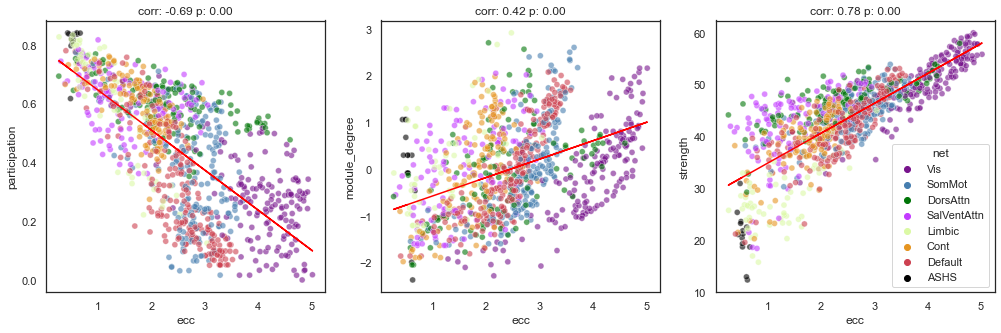

In [42]:
from scipy.stats import pearsonr

fig, axes = plt.subplots(1, 3, figsize=(17, 5))

for i, col in enumerate(['participation', 'module_degree', 'strength']):
    seaborn.scatterplot(x='ecc', y=col, data=ref_measures, ax=axes[i], alpha=.6,
                        hue='net', hue_order=cmap8.keys(), palette=seaborn.color_palette(cmap8.values()))
    corr, p = pearsonr(ref_measures['ecc'], ref_measures[col])

    x, y = ref_measures['ecc'], ref_measures[col]
    m, b = np.polyfit(x, y, 1)
    axes[i].plot(x, m*x + b, color='red')

    axes[i].set_title(f'corr: {corr:.2f} p: {p:.2f}')

axes[0].get_legend().remove()
axes[1].get_legend().remove()
plt.savefig("graph-measures-vs-ecc-Keanna's.png", dpi=300)
plt.show()